# Diseño de un sistema de aprendizaje automático



Curso: Reconocimiento de Patrones y Sistemas Embebidos de Alto Desempeño       

Integrantes: 
* Douglas Mora 
* Kaleb Alfaro
* Alejandro Bermudez
* David J Ramirez

## Red Neuronal Convolutiva de Clasificación entre Perros y Gatos.

El objetivo de esta sección consiste en la elaboración de un algoritmo de aprendizaje automático, para un problema de reconocimiento entre dos especies animales como lo son perros y gatos ya sea por medio de imagenes o video. Dada la naturaleza del problema, debe hacer uso de redes neuronales convolutivas (CNN) en cualquiera de sus versiones o bien la que usted diseñe.


In [2]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.preprocessing import LabelEncoder


import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np # funciones algebraicas
import pandas as pd # Procesamiento de datos y funciones para I/Os
import cv2
import matplotlib.pyplot as plt
import matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard

import os
print(os.listdir("input"))

from warnings import filterwarnings
filterwarnings('ignore')


['sampleSubmission.csv', 'test', 'train', 'Validate_Model']


In [4]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [5]:
matplotlib.style.use('ggplot')

## Preprocesamiento de la Imagenes

Hechando un vistazo al Dataset nos dimos cuenta que todas las imagenes no tenian las mismas dimensiones en terminos de pixeles asi que procedimos a realizarles un preprocesamiento que consistió en:

* Pasar las imagens del grupo de entrenamiento a escala de grises 
* Cambiar todas las imagenes a un mismo tamaño

Nota. El tamaño fue seleccionado en 100x100 debido a que notamos que se podia visualizar de una forma clara la mayoria de las imagenes.

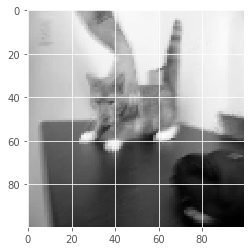

In [6]:
main_dir = "input/"
train_dir = "train/"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(100, 100))
    plt.imshow(new_img_array,cmap="gray")
    break

Como se puede observar la imagen se nota claramente. Por otro lado, el ciclo se detuvo en la primera imagen debido al break

In [7]:
category

'cat'

Procedemos a hacer el preprocesamiento a todas las imagenes del set de entrenamiento.

Adicionalmente, realiza la clasificación del set de datos donde por medio del nombre de la imagen se da cuenta que hay dos: 'Dog' y 'Cat'.

Esto puede tardar algunos segundos.

In [8]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(100, 100))
        X.append(new_img_array)
        y.append(category)

In [9]:
create_test_data(path)
X = np.array(X).reshape(-1, 100,100,1)
y = np.array(y)

In [10]:
X_Backup = X
y_Backup = y

Normalización de los Datos

In [11]:
#Normalize data
X = X/255.0

### Primera Iteración de la Red Neuronal Convolutiva 

In [12]:
modelFirst = Sequential()

#Layer 1
modelFirst.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:])) #3,3
modelFirst.add(MaxPooling2D(pool_size = (2,2)))  #2,2
Dropout(0.25)

#Layer 2
modelFirst.add(Conv2D(64,(3,3), activation = 'relu')) #32
#Dropout(0.5)
modelFirst.add(MaxPooling2D(pool_size = (2,2)))#2,2

modelFirst.add(Flatten())
modelFirst.add(Dense(32, activation='relu')) #32
#Dropout(0.25)

modelFirst.add(Dense(1, activation='sigmoid'))


modelFirst.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


Fase de entrenamiento

In [13]:
H1=modelFirst.fit(X, y, epochs=12, batch_size=32, validation_split=0.2) #12
# epocs = 10  batchsize = 64
H1

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/12
20000/20000 [==============================] - 366s 18ms/sample - loss: 0.5982 - acc: 0.6768 - val_loss: 0.7500 - val_acc: 0.5512
Epoch 2/12
20000/20000 [==============================] - 370s 19ms/sample - loss: 0.4885 - acc: 0.7674 - val_loss: 0.6211 - val_acc: 0.6888
Epoch 3/12
20000/20000 [==============================] - 363s 18ms/sample - loss: 0.4297 - acc: 0.8009 - val_loss: 0.7223 - val_acc: 0.6260
Epoch 4/12
20000/20000 [==============================] - 365s 18ms/sample - loss: 0.3744 - acc: 0.8327 - val_loss: 0.7691 - val_acc: 0.6370
Epoch 5/12
20000/20000 [==============================] - 362s 18ms/sample - loss: 0.3264 - acc: 0.8565 - val_loss: 0.4946 - val_acc: 0.7890
Epoch 6/12
20000/20000 [==============================] - 362s 18ms/sample - loss: 0.2649 - acc: 0.8863 - val_loss: 0.8479 - val_acc: 0.6634
Epoch 7/12
20000/20000 [==============================] -

Gráficas para tener un mejor entendimiento de como se comporta el entrenamiento con el set de datos de train

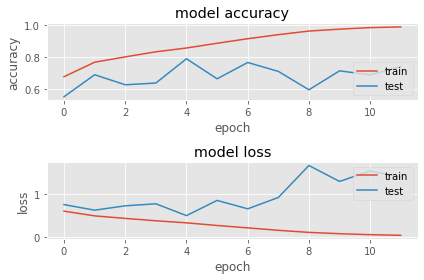

In [15]:
import os
# Graficas de las metricas 
fig1 = plt.figure()
plt.subplot(2,1,1)
plt.plot(H1.history['acc'])
plt.plot(H1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(H1.history['loss'])
plt.plot(H1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Rapidamente el test cae en comparación al entrenamiento. Lo que se busca esq el train y el test sigan cierto patron. Se realizará una etapa de Tunning para mejorar el modelo. También se generará el modelo actual con el fin de realizar comparativas con el mejorado.

In [14]:
modelFirst.save("First_Model.h5")
modelFirst.save_weights("JETSON_First_Model.h5")

## Criterios para hacer 'Tunning' de la red neuronal por hiper parametros.

* Leaning Rate (LR): Este permite iniciar en una base y consecuentemente decrementa en el siguiente epoch

* Batch Size: Este se recomienda con el maximo batch size que la GPU puede manejar.

* Incremento de la capacidad del modelo: incrementando el numero de capas y tamaño de los filtros en la convolución.


Para el caso de la implementación se utilizó un valor inicial de LR=0.001 que mostro una capacidad muy rapida de aprendizaje y practicamente ya el modelo despues del epoch 7/50 no tenia nada que aprender asi que se procedio a utilziar LR=0.001

El Batch size utilizado fue de 32 debido aque el accuracy cuando se utilizo 64 no tuvo tan buen rendimiento en terminos del training.

El incremento de la capacidad del modelo lo mantuvimos bajo ya que queriamos evitar tener demasiados parametros para que pudiese ejecutarse de una mejor manera en el hardware a utilizar (Jetson Nano)


In [192]:
model = Sequential()

#Layer 1
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = X.shape[1:])) #3,3
model.add(MaxPooling2D(pool_size = (2,2)))  #2,2
#Dropout(0.25)

#Layer 2
model.add(Conv2D(32,(3,3), activation = 'relu')) #32
#Dropout(0.5)
model.add(MaxPooling2D(pool_size = (2,2)))#2,2

model.add(Flatten())
model.add(Dense(32, activation='relu')) #32
#Dropout(0.25)

model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

- Durante el entrenamiento de la red neuronal convolutiva se detecto la necesidad de disminuir el learning rate dado que en los primeros Epochs ya alcanzaba una precición relativamente alto (93%). 
- Paralelamente se modificó la cantidad de epocs ya que podria tardar mas el entrenamiento. Anteriormente estaba en 10 y quedó en 50.


In [193]:
H=model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2) #12
# epocs = 10  batchsize = 64
H

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 174s 9ms/sample - loss: 0.6314 - acc: 0.6343 - val_loss: 1.2475 - val_acc: 0.0476
Epoch 2/50
20000/20000 [==============================] - 174s 9ms/sample - loss: 0.5860 - acc: 0.6966 - val_loss: 0.8057 - val_acc: 0.5148
Epoch 3/50
20000/20000 [==============================] - 177s 9ms/sample - loss: 0.5436 - acc: 0.7354 - val_loss: 0.7970 - val_acc: 0.5048
Epoch 4/50
20000/20000 [==============================] - 185s 9ms/sample - loss: 0.4997 - acc: 0.7609 - val_loss: 0.7836 - val_acc: 0.5336
Epoch 5/50
20000/20000 [==============================] - 189s 9ms/sample - loss: 0.4822 - acc: 0.7707 - val_loss: 0.6175 - val_acc: 0.6612
Epoch 6/50
20000/20000 [==============================] - 181s 9ms/sample - loss: 0.4650 - acc: 0.7818 - val_loss: 0.7615 - val_acc: 0.5710
Epoch 7/50
20000/20000 [==============================] - 175s 9ms/sample - loss: 0.4528 - acc: 0.7876 - val_lo


------------------------------------------------------------------------

## Resultados del Entrenamiento

Una vez terminado el training fue necesario interpretar los resultados de presición y perdidas por medio de gráficas

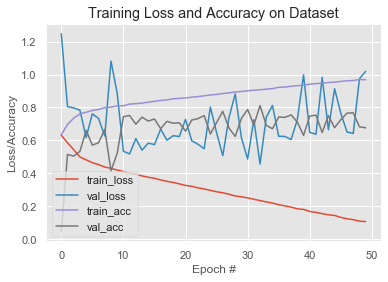

In [194]:

N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

Para tener una mayor visibilidad de los parametros se utilizó model.summary esto con el fin de tener un criterio de la cantidad de parametros que estarian siendo ejecutados en el hardware. 
Durante las fases de pruebas se obtuvieron cantidades de parametros cercanas a los 8 millones asi que la eliminación de Dropouts y modificacion de  

In [225]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                541728    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total para

### Creación del modelo para distribución en un Sistema Embebido

In [226]:
model.save("Final_Project_Model.h5")
model.save_weights("JETSON Model.h5")

### Registro de las predicciones en un archivo CSV

In [227]:
train_dir = "test"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(100, 100))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,100,100,1)
X_test = X_test/255

In [228]:
predictions = model.predict(X_test)

In [200]:
predicted_val = [int(round(p[0])) for p in predictions]

In [201]:
#predicted_val

In [202]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [204]:
submission_df.to_csv("submission.csv", index=False)

### Predicción de una imagen externa al dataset común

Esta imagen es de un gato que pertenece a uno de los integrantes del grupo que desarrollo esta red neuronal convolutiva.

El principal objetivo era verificar lo que obteniamos como resultado de una imagen totalmente externa a las imagenes in cluidas en el dataset.


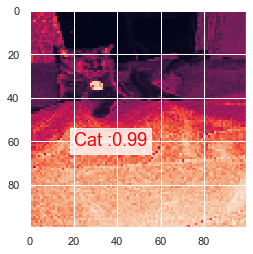

In [302]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

Predict_Path = 'sombra2.jpg'
#Predict_Path = '6666.jpg'


img_array2 = cv2.imread(Predict_Path,cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img_array2, dsize=(100, 100)) ## Ojo

img = image.img_to_array(img2)
img = img/255
                              

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img2)
plt.show()

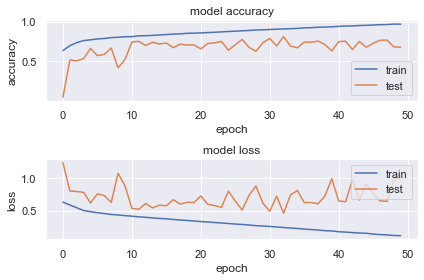

In [303]:
import os
# Graficas de las metricas 
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

#fig

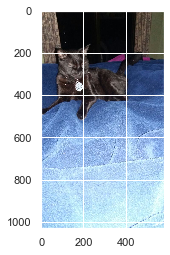

In [304]:
#Input Image for Layer visualization
#img1 = image.load_img('6666.jpg')

#Predict_Path = '6666.jpg'
Predict_Path = 'sombra2.jpg'

img1 = image.load_img(Predict_Path)
plt.imshow(img1);

#Preprocesamiento
img_array2 = cv2.imread(Predict_Path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img_array2, dsize=(100, 100)) ## Ojo

#plt.imshow(img2);

img = image.img_to_array(img2)
img = img/255
                              
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)


## Ilustración de las etapas de Convolución y Filtrado

In [305]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_12', 'max_pooling2d_12', 'conv2d_13', 'max_pooling2d_13', 'flatten_6', 'dense_12', 'dense_13']


In [306]:
from tensorflow.keras.models import Model
conv2d_out = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_12').output)
conv2d_1_out = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_13').output)

In [307]:
conv2d_features = conv2d_out.predict(img)
conv2d_1_features = conv2d_1_out.predict(img)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('First conv layer feature output shape : ',conv2d_1_features.shape)

First conv layer feature output shape :  (1, 98, 98, 32)
First conv layer feature output shape :  (1, 47, 47, 32)


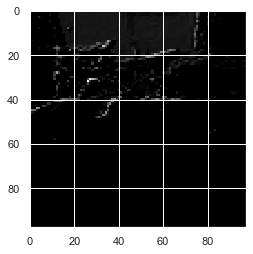

In [308]:
plt.imshow(conv2d_features[0, :, :, 4], cmap='gray')

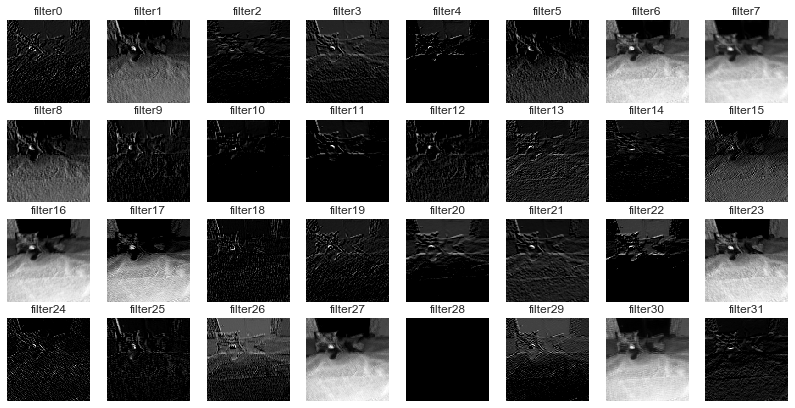

In [309]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

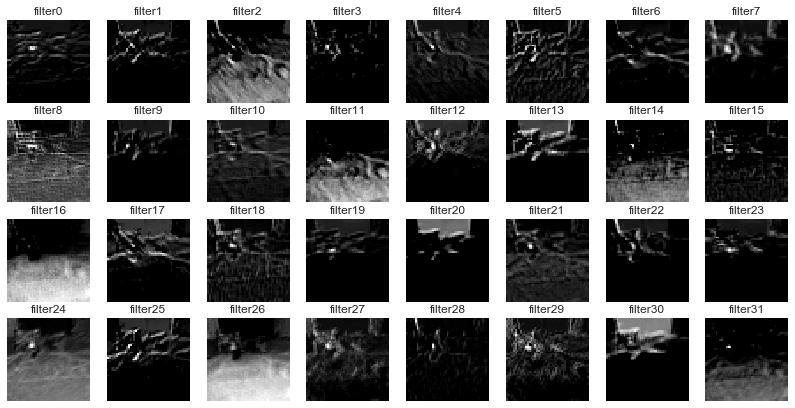

In [310]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

## Validación del modelo 

Para poder hacer uso de tecnicas de validación como la matriz de confusión y la funcion de keras de validate_generator es necesario crear un dataset de validación que cuente con las dos categorias disponibles (Cat and Dog) esto debido a que las imagenes de test no tienen ninguna etiqueta. Así, que se seleccionaron una cierta cantidad de imagenes de gatos y perros sin etiquetar y se localizaron en una carpeta con su nombre para que con esto poder comparar la predicción con la categoria real.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

test_Path = 'input/Validate_Model/test'
train_Path = 'input/Validate_Model/train'

#Training Set
train_set = train_datagen.flow_from_directory(train_Path,
                                             target_size=(100,100),
                                              color_mode = 'grayscale',
                                             batch_size=32,#32
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory(test_Path,
                                           target_size=(100,100),
                                            color_mode = 'grayscale',
                                           batch_size = 32, #32
                                           class_mode='binary',
                                           shuffle=False)


Found 120 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [7]:
from tensorflow.keras.models import load_model
classifier = load_model('Final_Project_Model.h5')

In [8]:
%%capture
classifier.fit_generator(train_set,
                        steps_per_epoch=10, 
                        epochs = 5, #5
                        validation_data = test_set,
                        validation_steps = 20, #20
                        #callbacks=[tensorboard]
                        );

In [9]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cat\10.jpg,0.01449,0,0
1,cat\11.jpg,0.00009,0,0
2,cat\13.jpg,0.00020,0,0
3,cat\14.jpg,0.00265,0,0
4,cat\15.jpg,0.07627,0,0
5,cat\16.jpg,0.00152,0,0
6,cat\19.jpg,0.99902,0,1
7,cat\20.jpg,0.97985,0,1
8,cat\22.jpg,0.07491,0,0
9,cat\25.jpg,0.99928,0,1


In [11]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 15


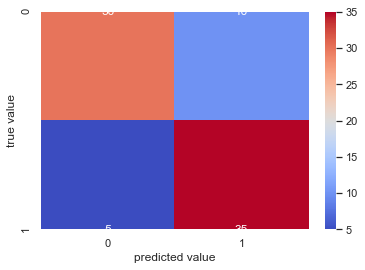

In [12]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.set(font_scale=1, color_codes=True, palette ='deep')
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt='g');  #fmt="g",annot_kws={'size':16}
plt.xlabel('predicted value')
plt.ylabel('true value');

In [13]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_set)
x2 = classifier.evaluate_generator(test_set)

In [14]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 90.00%     Training loss  : 0.190042
Validation Accuracy: 81.25%     Validation loss: 0.623671
